___
# Ciência dos Dados - PROJETO 1

## COLOQUE AQUI SEU NOME
___

Gustavo Pierre e Victor Jurdi

## TÍTULO DO SEU PROJETO

Descrever perfil dos brasileiros economicamente ativos

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


Nosso trabalho consiste em analisar as pessoas economicamente ativas que estao trabalhando em diferentes estados, considerando o grau de escolaridade.

___
## Filtros da base de dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gppie\Downloads


In [3]:
#Se usar o arquivo descompactado
#dados = pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
dados = pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2015,11,15,1,1,2,27,2,1992,...,1.0,800.0,4.0,5,1.0,2.0,2.0,1.0,800.0,20161117
1,1,2015,11,15,3,1,4,4,5,1992,...,1.0,1150.0,4.0,5,1.0,2.0,2.0,1.0,1150.0,20161117
2,2,2015,11,15,4,1,4,4,1,1980,...,6.0,793.0,4.0,6,1.0,2.0,2.0,1.0,793.0,20161117
3,3,2015,11,15,4,2,2,5,6,1981,...,6.0,793.0,4.0,7,1.0,2.0,2.0,1.0,793.0,20161117
4,4,2015,11,15,4,3,4,8,4,2004,...,6.0,793.0,4.0,2,2.0,NaN,NaN,2.0,793.0,20161117


In [4]:
dados['V4704'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    2.0
Name: V4704, dtype: float64

In [5]:
dados["V4704"].value_counts()

1.0    183089
2.0    125510
Name: V4704, dtype: int64

In [6]:
dados11 = pd.read_csv('PES2011csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados11.head()

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2011,11,11000000.0,1,1,2,25,12,1961,49,...,4.0,1.000000e+12,99.0,2,1.0,2.0,2.0,1.0,1.000000e+12,20100000.0
1,2011,11,11000000.0,1,2,4,1,4,1978,33,...,4.0,1.000000e+12,99.0,6,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
2,2011,11,11000000.0,1,3,4,15,6,1996,15,...,4.0,1.000000e+12,99.0,3,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
3,2011,11,11000000.0,1,4,2,3,12,2001,9,...,4.0,1.000000e+12,99.0,2,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
4,2011,11,11000000.0,2,1,4,16,10,1959,51,...,4.0,1.461000e+03,5.0,4,1.0,2.0,2.0,1.0,1.461000e+03,20100000.0


In [7]:
dados11['V4704'].head()

0    1.0
1    2.0
2    2.0
3    NaN
4    1.0
Name: V4704, dtype: float64

In [8]:
dados11["V4704"].value_counts()

1.0    183281
2.0    122454
Name: V4704, dtype: int64

In [9]:
dadosx = dados.loc[:, ['V4704', 'UF','V6007','V9008','V0302','V8005','V9001']]
dadosx = dadosx.dropna()
dadosx.head()

,V4704,UF,V6007,V9008,V0302,V8005,V9001
14,1.0,11,4.0,6.0,2,50,1.0
137,1.0,11,4.0,4.0,2,31,1.0
140,1.0,11,4.0,13.0,4,49,3.0
146,1.0,11,4.0,3.0,2,35,1.0
150,1.0,11,4.0,7.0,2,47,1.0


In [10]:
dadosy = dados11.loc[:, ['V4704', 'UF','V6007','V9008','V0302','V8005','V9001']]
dadosy = dadosy.dropna()
dadosy.head()

,V4704,UF,V6007,V9008,V0302,V8005,V9001
26,1.0,11,1.0,5.0,2,60,1.0
40,1.0,11,1.0,9.0,2,57,1.0
151,1.0,11,4.0,2.0,2,38,1.0
259,1.0,11,4.0,1.0,2,17,1.0
267,1.0,11,4.0,1.0,2,27,1.0


LEGENDA:

-V4704 = Condição de atividade na semana de referência para pessoas de 10 anos ou mais de idade

-V9088	=  autonomos

-V0101 =  estado

-V6007	= escolaridade

-V0302	= sexo

-V8005	= idade

In [11]:
dadosx.dtypes

V4704    float64
UF         int64
V6007    float64
V9008    float64
V0302      int64
V8005      int64
V9001    float64
dtype: object

In [12]:
def para_cat (coluna):
    dadosx[coluna] = dadosx[coluna].astype('int64')
    
for e in dadosx:
    coluna = para_cat(e)

In [13]:
dadosx.dtypes

V4704    int64
UF       int64
V6007    int64
V9008    int64
V0302    int64
V8005    int64
V9001    int64
dtype: object

In [14]:
dadosx.loc[(dadosx.UF>10)&(dadosx.UF<20),'Regiao'] = 'Norte'
dadosx.loc[(dadosx.UF>20)&(dadosx.UF<30),'Regiao'] = 'Nordeste'
dadosx.loc[(dadosx.UF>30)&(dadosx.UF<40),'Regiao'] = 'Sudeste'
dadosx.loc[(dadosx.UF>40)&(dadosx.UF<50),'Regiao'] = 'Sul'
dadosx.loc[(dadosx.UF>50)&(dadosx.UF<60),'Regiao'] = 'Centro Oeste'

In [20]:
dadosx.head()

,PEA,UF,Escolaridade,Ocupação no Trabalho,Sexo,Idade,Trabalhou na semana de ref,Regiao
14,1,11,Regular EF,6,Masculino,50,Sim,Norte
137,1,11,Regular EF,4,Masculino,31,Sim,Norte
140,1,11,Regular EF,13,Feminino,49,Não,Norte
146,1,11,Regular EF,3,Masculino,35,Sim,Norte
150,1,11,Regular EF,7,Masculino,47,Sim,Norte


In [16]:
dadosx.V4704 = dadosx.V4704.astype('category')
dadosx.V6007 = dadosx.V6007.astype('category')
dadosx.V9008 = dadosx.V9008.astype('category')
dadosx.V0302 = dadosx.V0302.astype('category')
dadosx.V8005 = dadosx.V8005.astype('category')
dadosx.V9001 = dadosx.V9001.astype('category')

In [44]:
dadosx.V6007.cat.categories = ('Primário','Médio(1ºciclo)','Médio(2ºciclo)','Regular EF','Regular EM','Supletivo EF','Supletivo EM','Superior','Mestrado ou Doutorado','Alfabetizado','CA','Maternal')
#dadosx.V9008.cat.categories = ()
dadosx.V0302.cat.categories = ('Masculino','Feminino')
dadosx.V9001.cat.categories = ('Sim','Não')

AttributeError: 'DataFrame' object has no attribute 'V6007'

In [18]:
dadosx.rename(columns={'V4704':'PEA','V6007':'Escolaridade','V9008':'Ocupação no Trabalho','V0302':'Sexo','V8005':'Idade','V9001':'Trabalhou na semana de ref'},inplace=True)
dadosx.head()

,PEA,UF,Escolaridade,Ocupação no Trabalho,Sexo,Idade,Trabalhou na semana de ref,Regiao
14,1,11,Regular EF,6,Masculino,50,Sim,Norte
137,1,11,Regular EF,4,Masculino,31,Sim,Norte
140,1,11,Regular EF,13,Feminino,49,Não,Norte
146,1,11,Regular EF,3,Masculino,35,Sim,Norte
150,1,11,Regular EF,7,Masculino,47,Sim,Norte


___
## Análise e Resultados

Text(0,0.5,'Frequência Relativa')

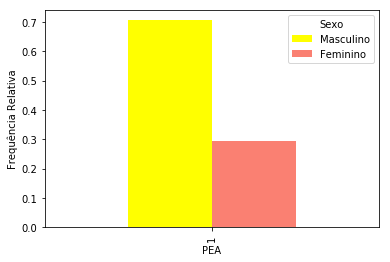

In [21]:
ct = pd.crosstab(dadosx.PEA, dadosx.Sexo,normalize=True)
ct.plot(kind='bar', color=('yellow', 'salmon'))
plt.ylabel('Frequência Relativa')

Text(0,0.5,'Frequência Relativa')

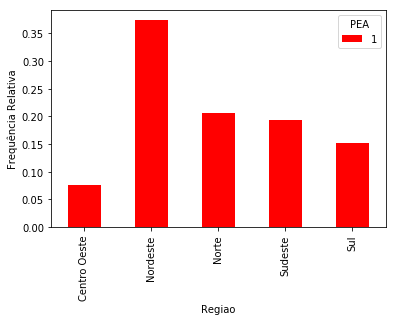

In [48]:
ct2 = pd.crosstab(dadosx.Regiao, dadosx.PEA,normalize=True)
ct2.plot(kind='bar', color=('red'))
plt.ylabel('Frequência Relativa')

Text(0,0.5,'Frequência Relativa')

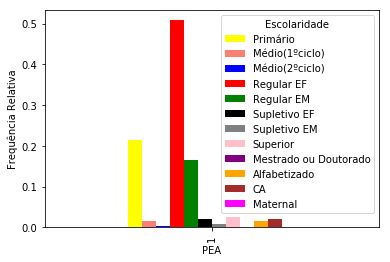

In [23]:
ct3 = pd.crosstab(dadosx.PEA, dadosx.Escolaridade,normalize=True)
ct3.plot(kind='bar', color=('yellow', 'salmon','blue','red','green','black','grey','pink','purple','orange','brown','magenta'))
plt.ylabel('Frequência Relativa')

Text(0,0.5,'Frequência Relativa')

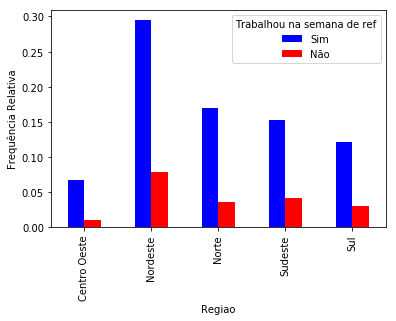

In [26]:
ct4 = pd.crosstab(dadosx.Regiao, dadosx['Trabalhou na semana de ref'],normalize=True)
ct4.plot(kind='bar', color=('blue','red'))
plt.ylabel('Frequência Relativa')

Text(0,0.5,'Frequência Relativa')

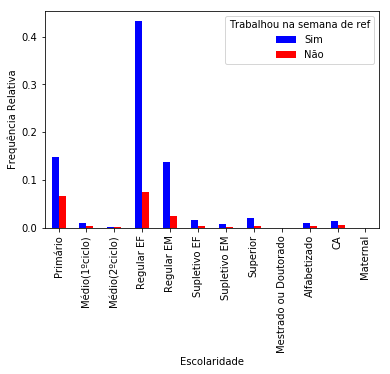

In [25]:
ct5 = pd.crosstab(dadosx.Escolaridade, dadosx['Trabalhou na semana de ref'],normalize=True)
ct5.plot(kind='bar', color=('blue','red'))
plt.ylabel('Frequência Relativa')

Text(0,0.5,'Frequência Relativa')

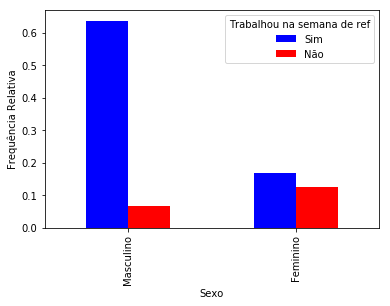

In [50]:
ct6 = pd.crosstab(dadosx.Sexo, dadosx['Trabalhou na semana de ref'],normalize=True)
ct6.plot(kind='bar', color=('blue','red'))
plt.ylabel('Frequência Relativa')

In [28]:
dadosx.PEA.value_counts()

1    18262
Name: PEA, dtype: int64

In [29]:
dadosx['Trabalhou na semana de ref'].value_counts(True)

Sim    0.805498
Não    0.194502
Name: Trabalhou na semana de ref, dtype: float64

Text(0,0.5,'Frequência Relativa')

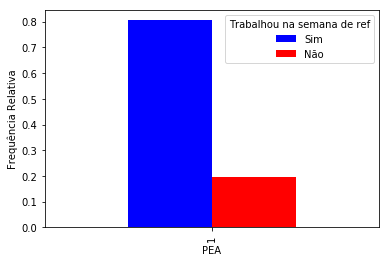

In [30]:
ct7 = pd.crosstab(dadosx.PEA, dadosx['Trabalhou na semana de ref'],normalize = True)
ct7.plot(kind='bar', color=('blue','red'))
plt.ylabel('Frequência Relativa')

Text(0,0.5,'Frequência Relativa')

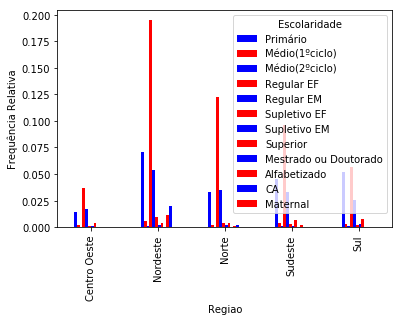

In [51]:
ct8 = pd.crosstab(dadosx.Regiao, dadosx.Escolaridade,normalize = True)
ct8.plot(kind='bar', color=('blue','red'))
plt.ylabel('Frequência Relativa')

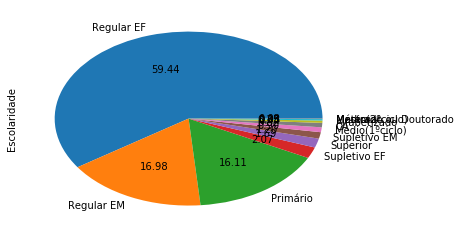

In [52]:
inadim = dadosx.Escolaridade[dadosx.Regiao == 'Norte'].value_counts()
inadim.plot(kind='pie', autopct="%.2f",legend=False)

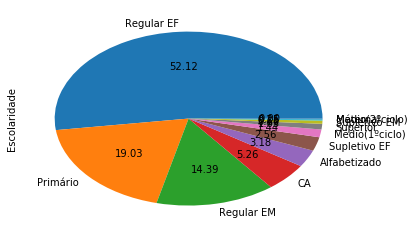

In [53]:
inadim = dadosx.Escolaridade[dadosx.Regiao == 'Nordeste'].value_counts()
inadim.plot(kind='pie', autopct="%.2f",legend=False)

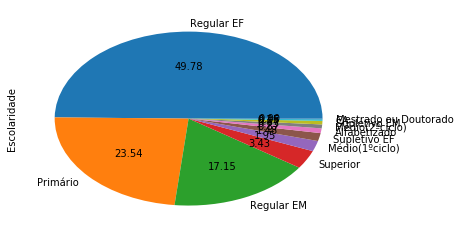

In [55]:
inadim = dadosx.Escolaridade[dadosx.Regiao == 'Sudeste'].value_counts()
inadim.plot(kind='pie', autopct="%.2f",legend=False)

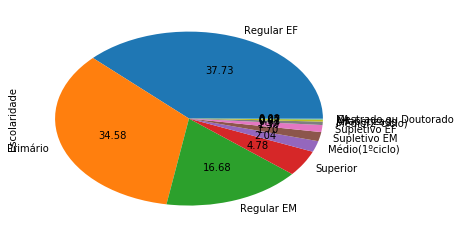

In [56]:
inadim = dadosx.Escolaridade[dadosx.Regiao == 'Sul'].value_counts()
inadim.plot(kind='pie', autopct="%.2f",legend=False)

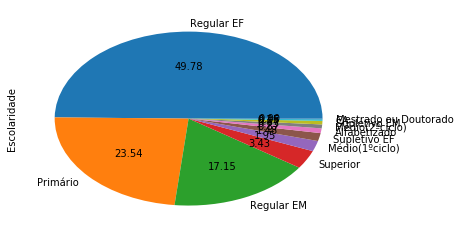

In [57]:
inadim = dadosx.Escolaridade[dadosx.Regiao == 'Sudeste'].value_counts()
inadim.plot(kind='pie', autopct="%.2f",legend=False)

In [31]:
ct5

Trabalhou na semana de ref,Sim,Não
Escolaridade,,
Primário,0.148943,0.065929
Médio(1ºciclo),0.010952,0.005147
Médio(2ºciclo),0.001917,0.001917
Regular EF,0.432647,0.075402
Regular EM,0.138977,0.025463
Supletivo EF,0.016154,0.003778
Supletivo EM,0.007830,0.001588
Superior,0.022013,0.003340
Mestrado ou Doutorado,0.000493,0.000164


In [32]:
ct4

Trabalhou na semana de ref,Sim,Não
Regiao,,
Centro Oeste,0.066588,0.009865
Nordeste,0.294827,0.078975
Norte,0.169777,0.035872
Sudeste,0.152009,0.040861
Sul,0.120957,0.030267


In [38]:
dadosy.dtypes

V4704    int64
UF       int64
V6007    int64
V9008    int64
V0302    int64
V8005    int64
V9001    int64
dtype: object

In [35]:
dadosy.V4704 = dadosy.V4704.astype('int64')
dadosy.V6007 = dadosy.V6007.astype('int64')
dadosy.V9008 = dadosy.V9008.astype('int64')
dadosy.V9001 = dadosy.V9001.astype('int64')

In [39]:
dadosy.loc[(dadosy.UF>10)&(dadosy.UF<20),'Regiao'] = 'Norte'
dadosy.loc[(dadosy.UF>20)&(dadosy.UF<30),'Regiao'] = 'Nordeste'
dadosy.loc[(dadosy.UF>30)&(dadosy.UF<40),'Regiao'] = 'Sudeste'
dadosy.loc[(dadosy.UF>40)&(dadosy.UF<50),'Regiao'] = 'Sul'
dadosy.loc[(dadosy.UF>50)&(dadosy.UF<60),'Regiao'] = 'Centro Oeste'

In [40]:
dadosy.V4704 = dadosy.V4704.astype('category')
dadosy.V6007 = dadosy.V6007.astype('category')
dadosy.V9008 = dadosy.V9008.astype('category')
dadosy.V0302 = dadosy.V0302.astype('category')
dadosy.V8005 = dadosy.V8005.astype('category')
dadosy.V9001 = dadosy.V9001.astype('category')

In [45]:
dadosy.V6007.cat.categories = ('Primário','Médio(1ºciclo)','Médio(2ºciclo)','Regular EF','Regular EM','Supletivo EF','Supletivo EM','Superior','Mestrado ou Doutorado','Alfabetizado','Creche','CA','Maternal')
#dadosy.V9008.cat.categories = ()
dadosy.V0302.cat.categories = ('Masculino','Feminino')
#dadosy.V8005.cat.categories = ()
dadosy.V9001.cat.categories = ('Sim','Não')

In [46]:
dadosy.head()

,V4704,UF,V6007,V9008,V0302,V8005,V9001,Regiao
26,1,11,Primário,5,Masculino,60,Sim,Norte
40,1,11,Primário,9,Masculino,57,Sim,Norte
151,1,11,Regular EF,2,Masculino,38,Sim,Norte
259,1,11,Regular EF,1,Masculino,17,Sim,Norte
267,1,11,Regular EF,1,Masculino,27,Sim,Norte


In [47]:
dadosy.rename(columns={'V4704':'PEA','V6007':'Escolaridade','V9008':'Ocupação no Trabalho','V0302':'Sexo','V8005':'Idade','V9001':'Trabalhou na semana de ref'},inplace=True)
dadosy.head()

,PEA,UF,Escolaridade,Ocupação no Trabalho,Sexo,Idade,Trabalhou na semana de ref,Regiao
26,1,11,Primário,5,Masculino,60,Sim,Norte
40,1,11,Primário,9,Masculino,57,Sim,Norte
151,1,11,Regular EF,2,Masculino,38,Sim,Norte
259,1,11,Regular EF,1,Masculino,17,Sim,Norte
267,1,11,Regular EF,1,Masculino,27,Sim,Norte


___
## Conclusão 

Descreva aqui suas conclusões!